<a href="https://colab.research.google.com/github/NLP8/FeatureEngineering23/blob/main/feat_engineering_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD DEL VALLE DE GUATEMALA**  
**FEATURE ENGINEERING - 2023**

---

**Tarea 1**

```
Autores: 
  Jose Antonio Ramirez Recinos
  Ana Lucia Catalan Cabrera
  Diego Alejandro Castaneda Calderon
```

      

**Nombre del conjunto de datos:**  [Diabetes prediction dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset) / diabetes_prediction_dataset.csv

**Descripción del conjunto de datos:** este conjunto de datos contiene datos médicos y demográficos de 100,000 pacientes.

**Variables del conjunto de datos:** los datos están en formato CSV. Cada fila representa un paciente y cada columna representa una característica. Las características son:

- ***Age:***  La edad del paciente en años.
    
- ***Gender:*** El sexo del paciente, hombre o mujer.
    
- ***BMI:*** El índice de masa corporal del paciente, calculado como el peso en kilogramos dividido por la altura en metros al cuadrado.
    
- ***Hypertension:*** Si el paciente tiene hipertensión, 0 no tiene hipertensión y 1 si tiene hipertensión.

- ***Heart disease:*** Si el paciente tiene una enfermedad cardíaca, condición en la que el corazón no puede bombear sangre de manera efectiva, 0 si no tiene enferdad cardíaca y 1 si tiene enfermedad cardíaca.

- ***Smoking history:*** Historial de tabaquismo del paciente.5 categorías que describen este historial.

- ***HbA1c level:*** El nivel de HbA1c del paciente, una medida del nivel promedio de azúcar en la sangre durante los últimos tres meses.

- ***Blood glucose level:*** El nivel de glucosa en sangre del paciente, una medida de la cantidad de azúcar en la sangre.

**Tipos de Variables**

Numérica Discreta
1. Hypertension
2. Heart disease
3. Blood glucose level
4. Diabetes

Numérica Continua
5. Age
6. BMI
7. HbA1c level

Categórica Nominal
8. Gender
9. Smoking history

**Variable objetivo:** la variable objetivo es el estado de diabetes del paciente. Es una variable binaria, con 0 que representa negativo y 1 que representa positivo.

**Motivación:** este conjunto de datos se puede usar para crear modelos de aprendizaje automático para predecir la diabetes en pacientes en función de su historial médico e información demográfica. *Adicional se espera practicar y explorar las diferentes técnicas de feature engineering*.

In [ ]:
# Download data directly from Kaggle using Google Colab
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Download File
!pip install kaggle
!mkdir -p ~/.kaggle 

# You need to upload a token by kaggle to be able to directly download the files to the notebook
# For more information consult the following link https://www.kaggle.com/general/74235
!cp /content/drive/MyDrive/kaggle_token/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download iammustafatz/diabetes-prediction-dataset
!unzip /content/diabetes-prediction-dataset.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
diabetes-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/diabetes-prediction-dataset.zip
replace diabetes_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes_prediction_dataset.csv  


In [ ]:
# Dependencies
import numpy as np
import pandas as pd

import re

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read File
df = pd.read_csv("/content/diabetes_prediction_dataset.csv", encoding="utf-8")
diabetes_df = df.copy()

print(diabetes_df.shape)

(100000, 9)


**Data Cleaning / Limpieza de Datos**

El objetivo de la limpieza de datos es identificar y corregir errores en los datos. Esto puede incluir la corrección de errores tipográficos, la eliminación de datos duplicados y el llenado de datos faltantes.

En nuestro caso, busco específicamente datos mal grabados o en mal formato. También estoy buscando cualquier tipo de información que pueda necesitar estar en un formato especial, como un tipo de caso específico. Luego, esta información se limpia y formatea para que sea más fácil trabajar con ella y analizarla.


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Renaming the column HbA1c_level" to "glycated_hemoglobin_level"
diabetes_df = diabetes_df.rename(columns={"HbA1c_level": "hemoglobin_a1c_level"})

In [ ]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,hemoglobin_a1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
for column in diabetes_df.columns:
    # Check if the column is categorical
    if diabetes_df[column].dtype == "object":
        print(f"Unique values in {column}:")
        print(diabetes_df[column].unique())
        print()

Unique values in gender:
['Female' 'Male' 'Other']

Unique values in smoking_history:
['never' 'No Info' 'current' 'former' 'ever' 'not current']



In [ ]:
# Regular expression pattern
pattern = r"\s+"

# Replace values in the DataFrame
diabetes_df["gender"] = diabetes_df["gender"].apply(lambda x: re.sub(pattern, '_', x.lower()))
diabetes_df["smoking_history"] = diabetes_df["smoking_history"].apply(lambda x: re.sub(pattern, "_", x.lower()))

**Conclusiones Limpieza de Datos**

No tenemos datos faltantes en las columnas, lo cual es prometedor para nuestro análisis. Para mejorar la comodidad, cambiamos el nombre de la columna "HbA1c_level" a "hemoglobin_a1c_level". Además, modificamos ciertos valores de columnas categóricas para garantizar la coherencia y facilitar operaciones futuras.

Al emplear el método ".describe()", obtuvimos información sobre la distribución de los datos, incluidos los cuartiles y los valores mínimo y máximo. En términos de valores atípicos, la columna de edad parece estar dentro de un rango normal. Sin embargo, la columna bmi exhibe un valor máximo de 95,6, que puede considerarse un valor atípico. En particular, descubrimos que en algunos casos se han registrado valores extremos de BMI que superan las 100 unidades.

En cuanto al nivel de glucosa en sangre, investigaciones preliminares sugieren que varía a lo largo del día. El valor registrado más alto parece estar dentro de un rango normal, lo cual es alentador desde una perspectiva de salud.

**Exploratory Data Analysis / Análisis exploratorio de datos**

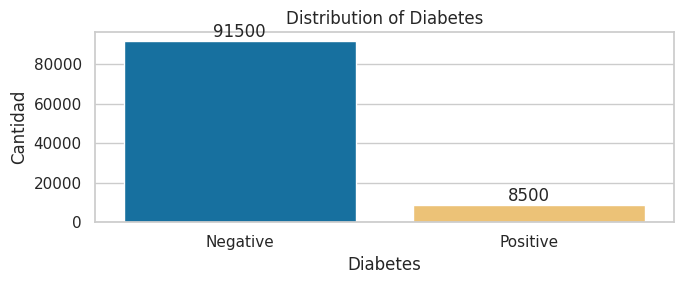

In [ ]:
# Calculate the frequency of each category
diabetes_counts = diabetes_df["diabetes"].value_counts()

# Set seaborn style and color palette
sns.set(style="whitegrid")
colors = ["#0077B6", "#FFC764"] 

# Create subplots with appropriate size
fig, ax = plt.subplots(figsize=(7, 3))

# Plot the bar plot with custom colors
sns.barplot(x=diabetes_counts.index.map({0: "Negative", 1: "Positive"}),
            y=diabetes_counts.values,
            ax=ax,
            palette=colors)

ax.set_xlabel("Diabetes")
ax.set_ylabel("Cantidad")
ax.set_title("Distribution of Diabetes")

# Add values on top of each bar
for i, count in enumerate(diabetes_counts.values):
    ax.annotate(str(count), xy=(i, count), ha="center", va="bottom")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the count of positive and negative values
positive_count = (diabetes_df["diabetes"] == 1).sum()
negative_count = (diabetes_df["diabetes"] == 0).sum()

total_count = positive_count + negative_count

# Print the difference in percentage
print(f"Porcentaje de valores positivos: {(positive_count / total_count) * 100:.2f}%")
print(f"Porcentaje de valores negativos: {(negative_count / total_count) * 100:.2f}%")

Porcentaje de valores positivos: 8.50%
Porcentaje de valores negativos: 91.50%


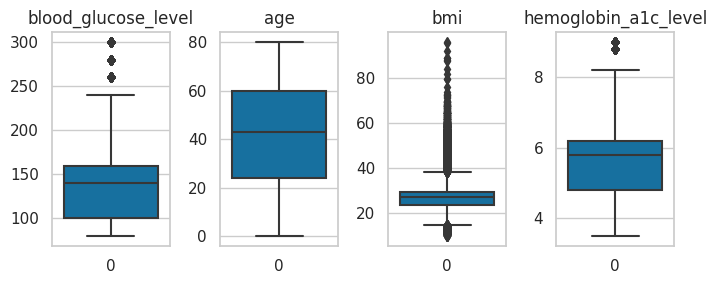

In [ ]:
# Select the numeric features for the box plot
numeric_features = ["blood_glucose_level", "age", "bmi", "hemoglobin_a1c_level"]

# Create subplots with appropriate size
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(7, 3))
color = "#0077B6"

# Iterate over the numeric features and create a box plot for each
for i, feature in enumerate(numeric_features):
    sns.boxplot(data=diabetes_df[feature], color=color, ax=axes[i])
    axes[i].set_title(feature)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

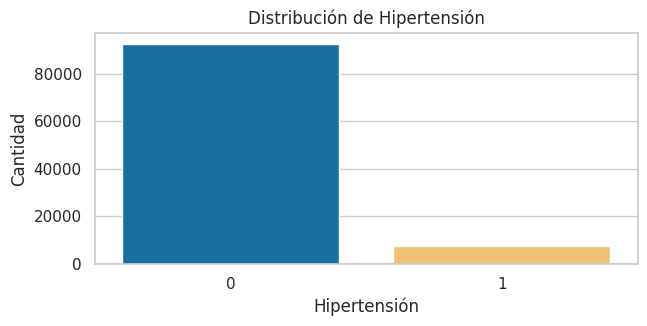

In [ ]:
# Count the occurrences of each category in the "hypertension" column
hypertension_counts = diabetes_df['hypertension'].value_counts()

# Count the occurrences of each category in the "heart_disease" column
heart_disease_counts = diabetes_df['heart_disease'].value_counts()
colors = ["#0077B6", "#FFC764"] 
# Set the figure size
plt.figure(figsize=(7, 3))

# Create a barplot for "hypertension" column
sns.barplot(x=hypertension_counts.index, y=hypertension_counts.values, palette=colors)

# Add labels and title
plt.xlabel('Hipertensión')
plt.ylabel('Cantidad')
plt.title('Distribución de Hipertensión')

# Display the plot
plt.show()

<ipython-input-13-5870793b5d18>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diabetes_df.corr()


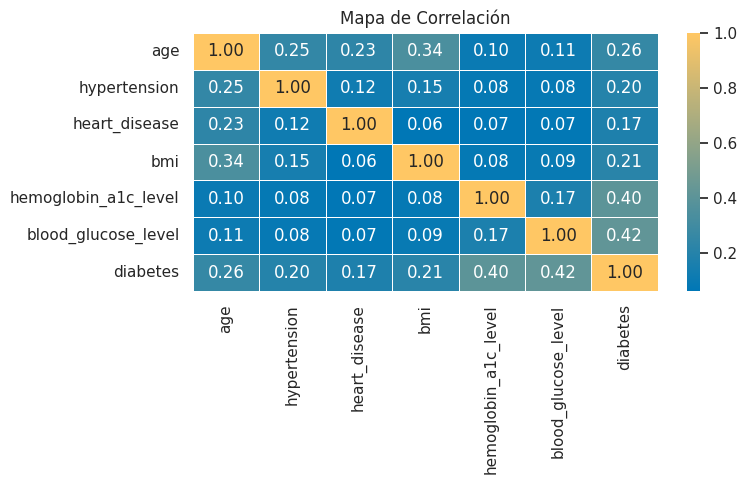

In [ ]:
# Create a colormap using the defined colors
cmap = mcolors.LinearSegmentedColormap.from_list("CustomDiverging", colors)

# Calculate the correlation matrix and then plot the heatmap
correlation_matrix = diabetes_df.corr()

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title("Mapa de Correlación")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Conclusiones tempranas del análisis exploratorio**

Al analizar el conjunto de datos, es evidente que la distribución de datos está desequilibrada, con aproximadamente el 10 por ciento representando a personas con diabetes. Es fundamental reconocer este desequilibrio de clases al realizar un análisis más profundo y considerar estrategias como la división estratificada para garantizar conjuntos de prueba y entrenamiento representativos.

Al examinar el diagrama de caja, observamos que la columna "bmi" contiene numerosos valores atípicos, que pueden indicar valores extremos. Por el contrario, las otras columnas parecen exhibir distribuciones más favorables sin valores atípicos significativos.

Un mapa de correlación revela relaciones notables entre las variables. En particular, la columna "bmi" demuestra una fuerte correlación con la "edad", lo que indica una posible conexión entre el índice de masa corporal y la edad. Además, el "blood_glucose_level" exhibe una correlación significativa con la columna "diabetes", lo que sugiere una posible relación predictiva. De manera similar, "hemoglobin_a1c_level" demuestra una correlación notable con la columna "diabetes".